In [1]:
from sympy import *
from sympy.solvers.solveset import linsolve
init_printing()
import numpy as np

In [8]:
P1, P2, P2a, P4, P5, P6, P8, P9, P10 = symbols("P_1, P_2, P_{2a}, P_4, P_5, P_6, P_8, P_9, P_{10}")

k1p, k2p, k3p, k1m, k2m, k3m = symbols('k_1^+ k_2^+ k_3^+ k_1^- k_2^- k_3^-')
km = symbols('k_-')

MgATP, Ca_cyt, Ca_er, KdH1, KdHi, MgADP, KdCai, KdCasr, KdHsr, H, KdH, Pi = symbols("MgATP, Ca_{cyt}, Ca_{er}, K_{dH1}, K_{dHi}, [MgADP], K_{dCai}, K_{dCasr}, K_{dHsr}, H, K_{dH}, P_i")
Q1, Q2, Q3, Q4, Q5 = symbols("Q_1, Q_2, Q_3, Q_4, Q_5")
epsilon, delta = symbols("epsilon delta")

In [9]:
# Quasi-steady-state conditions for protons

system = [ P2*H-KdH1*P2a, P5*H**2 - KdHi**2*P4, 
          P9*KdHsr**2 - P8*H**2, P10*H-KdH*P9,
         P1-Q1, Q2 - P2- P2a, Q3-P4-P5,Q5-P8-P9-P10, P6 - Q4]
system

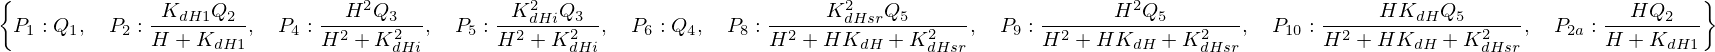

In [10]:
P_states = solve(system,[P1,P2a,P2,P4,P5,P6,P8,P9,P10])
P_states

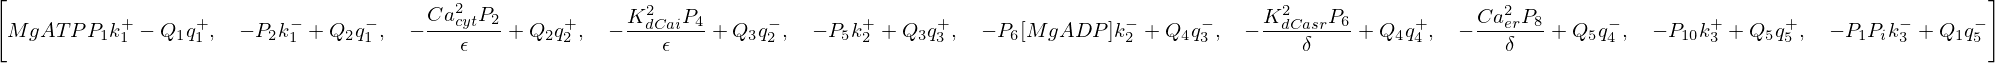

In [11]:
# solve for the effective q rates
q1p, q1m, q2p, q2m, q3p, q3m, q4p, q4m, q5p, q5m = symbols("q_1^+, q_1^-, q_2^+, q_2^-, q_3^+, q_3^-, q_4^+, q_4^-, q_5^+, q_5^-")

q_system = [
    k1p*MgATP*P1 - q1p*Q1, q1m*Q2 - k1m*P2, 
    q2p*Q2 - P2*Ca_cyt**2/epsilon, q2m*Q3-KdCai**2*P4/epsilon,
    q3p*Q3 - k2p*P5, q3m*Q4-k2m*P6*MgADP,
    q4p*Q4 - KdCasr**2*P6/delta, q4m*Q5 - Ca_er**2*P8/delta,
    q5p*Q5 - k3p*P10, q5m*Q1 - Pi*k3m*P1
]

q_system  
      
      

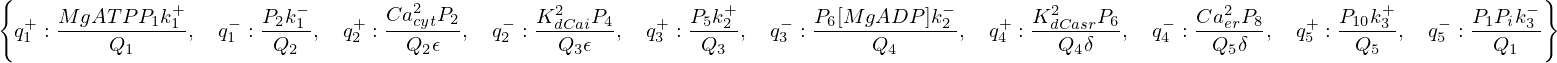

In [12]:
rates = solve(q_system, 
              [q1p, q1m, q2p, q2m, q3p, q3m, q4p, q4m, q5p, q5m]
             )
rates

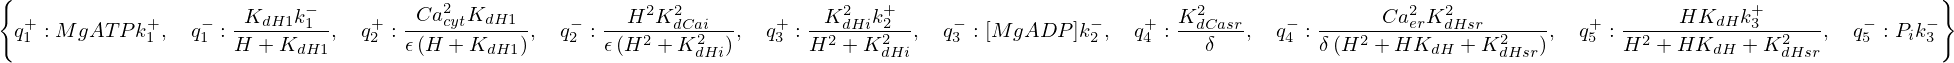

In [13]:
{key: rate.subs(P_states) for key,rate in rates.items()}